In [108]:
# import packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
from networkx.algorithms.community import girvan_newman, modularity
from pprint import pprint as pp


In [118]:
# load in the data
df = pd.read_csv("cleaned_data.csv")
df = df.drop(df.columns[0], axis=1)
df.head(5)


,from_address,to_address,value,from_address_type,to_address_type
0,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0,EOA,Contract
1,0x1e7f8de390b95f960d71fbfc42f3d91021fff7ad,0xb9665650e0de599c2fafbfe98cf160399f8a23ba,14.0,EOA,EOA
2,0x53f2736fae551c998d4e72e519f1acf474264de4,0x4dbd4fc535ac27206064b68ffcf827b0a60bab3f,7.0,EOA,Contract
3,0x318072374ffa96e8867138cd05c3be282f85f405,0x11111112542d85b3ef69ae05771c2dccff4faa26,8.0,EOA,Contract
4,0x9a429a5091fb9e00ec7185fa96494765d98f6d3f,0xe592427a0aece92de3edee1f18e0157c05861564,10.0,EOA,Contract


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   from_address       20000 non-null  object 
 1   to_address         20000 non-null  object 
 2   value              20000 non-null  float64
 3   from_address_type  20000 non-null  object 
 4   to_address_type    20000 non-null  object 
dtypes: float64(1), object(4)
memory usage: 781.4+ KB


In [120]:
userSpace = df[(df.from_address_type == 'EOA') & (df.to_address_type == 'EOA')]
contractSpace = df[(df.from_address_type == 'Contract')
                   & (df.to_address_type == 'Contract')]
bipartiteSpace = df[((df.from_address_type == 'EOA') & (df.to_address_type == 'Contract')) | (
    (df.from_address_type == 'Contract') & (df.to_address_type == 'EOA'))]


In [121]:
userSpace = userSpace[['from_address', 'to_address', 'value']]
userSpace.head()

,from_address,to_address,value
1,0x1e7f8de390b95f960d71fbfc42f3d91021fff7ad,0xb9665650e0de599c2fafbfe98cf160399f8a23ba,14.00
5,0x61e29379b06491ea5a0be90fae954c56c91fd9c4,0xfcadf00f3c5560fa0f1015ef5a8f20c17e6a5392,10.01
7,0xa12431d0b9db640034b0cdfceef9cce161e62be4,0x59a5208b32e627891c389ebafc644145224006e8,120.00
11,0x59a5208b32e627891c389ebafc644145224006e8,0xbdbf7f7135218fc78bea7e0ebbd6769a31af2976,100.00
13,0x5d478b5ea3ca7bfc287ada34b9a1eb6ac18cf9c1,0x92666ffd1df94f17707ddb94afc3bbadd3aa6def,37.50


In [122]:
G = nx.from_pandas_edgelist(userSpace,                # the df containing the data
                          source='from_address',        # first element of the dyad
                          target='to_address',        # second element of the dyad
                          edge_attr='value')


In [123]:
G?

Type:           Graph
String form:    Graph with 7445 nodes and 8335 edges
Length:         7445
File:           ~/opt/anaconda3/lib/python3.7/site-packages/networkx/classes/graph.py
Docstring:     
Base class for undirected graphs.

A Graph stores nodes and edges with optional data, or attributes.

Graphs hold undirected edges.  Self loops are allowed but multiple
(parallel) edges are not.

Nodes can be arbitrary (hashable) Python objects with optional
key/value attributes, except that `None` is not allowed as a node.

Edges are represented as links between nodes with optional
key/value attributes.

Parameters
----------
incoming_graph_data : input graph (optional, default: None)
    Data to initialize graph. If None (default) an empty
    graph is created.  The data can be any format that is supported
    by the to_networkx_graph() function, currently including edge list,
    dict of dicts, dict of lists, NetworkX graph, NumPy matrix
    or 2d ndarray, SciPy sparse matrix, or PyGraphv

In [124]:
# inspect the network
pp(nx.info(G))


'Graph with 7445 nodes and 8335 edges'


In [97]:
# draw the network
pos = nx.spring_layout(G)


Betweenness Centrality - quantifies the number of times a node acts as a bridge along the shortest path between two other nodes

In [98]:
# fit
solutions = girvan_newman(G)


In [99]:
# node to community affiliations
tuple(sorted(c) for c in next(solutions))


(['0x0000f079e68bbcc79ab9600ace786b0a4db1c83c',
  '0x000e20a2eefa97815f3f5057fcd8920acf1ae0de',
  '0x0016c0d0343e8f2c3a7b6a51606b84b1545ec606',
  '0x004346a93b231c73de8b71d53161c75bd67129e5',
  '0x0056bcfe33f5c6dfa62b6d3d3cf5a957429828bb',
  '0x005abeddceaa4f22849da5c7b8028b33326616db',
  '0x0084dfd7202e5f5c0c8be83503a492837ca3e95e',
  '0x00c8e5c048b87eddb494b539730b89750e6741c9',
  '0x01974549c9b9a30d47c548a16b120b1caa7b586c',
  '0x022ae2476193d48287ada036f6e91de3784beee9',
  '0x026a58e4e1fa3e82e9236331828701c1b0755b4d',
  '0x0279c0eaeb06602d2a3d21aa39af3f708e353e4c',
  '0x03490e013f47390aea78707a33a23c8d674e283a',
  '0x0349923ae2b35ff4f0099869aeea99d1f3fd12a9',
  '0x03ae1a796dfe0400439211133d065bda774b9d3e',
  '0x042a8fe9b600336823c0c5c2b2603aea02ba183d',
  '0x0525eb58f9d226adb659777791ddd994def56e1c',
  '0x0548f59fee79f8832c299e01dca5c76f034f558e',
  '0x0577a79cfc63bbc0df38833ff4c4a3bf2095b404',
  '0x064915a4dd54fabca5613be602d8b904cac25610',
  '0x06987e87df650260d11c961a5925b081455

In [102]:
# alternative paritioning solutions to consider
k = 20

# register modularit scores
modularity_scores = dict()

# iterate over solutions
for community in itertools.islice(solutions, k):
    solution = list(sorted(c) for c in community)
    score = modularity(G, solution)
    modularity_scores[len(solution)] = score


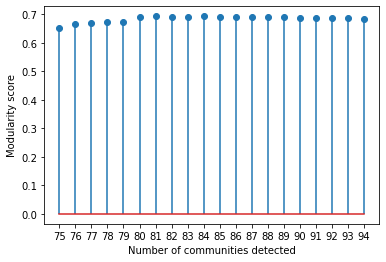

In [103]:
# plot modularity data
fig = plt.figure()
pos = list(modularity_scores.keys())
values = list(modularity_scores.values())
ax = fig.add_subplot(1, 1, 1)
ax.stem(pos, values)
ax.set_xticks(pos)
ax.set_xlabel(r'Number of communities detected')
ax.set_ylabel(r'Modularity score')
plt.show()


In [33]:
DG = nx.DiGraph(G)


In [34]:
node_dc = nx.degree_centrality(G)


In [35]:
nx.set_node_attributes(G, node_dc, 'G')


In [36]:
G1 = nx.MultiGraph(G)


In [125]:
bet_centrality = nx.betweenness_centrality(G)

print(bet_centrality)

{'0x1e7f8de390b95f960d71fbfc42f3d91021fff7ad': 0.0, '0xb9665650e0de599c2fafbfe98cf160399f8a23ba': 0.00020384187241989505, '0x61e29379b06491ea5a0be90fae954c56c91fd9c4': 0.0, '0xfcadf00f3c5560fa0f1015ef5a8f20c17e6a5392': 0.0, '0xa12431d0b9db640034b0cdfceef9cce161e62be4': 0.006707307256445782, '0x59a5208b32e627891c389ebafc644145224006e8': 0.010036342493476501, '0xbdbf7f7135218fc78bea7e0ebbd6769a31af2976': 0.003026881299771211, '0x5d478b5ea3ca7bfc287ada34b9a1eb6ac18cf9c1': 0.00020384187241989502, '0x92666ffd1df94f17707ddb94afc3bbadd3aa6def': 0.0, '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94': 0.07989949002676512, '0x705389c5d7f2754105de26e877716da77854943b': 6.804310184986146e-05, '0xe3031c1bfaa7825813c562cbdcc69d96fcad2087': 0.007411156720409715, '0x6b889cbf45a2dfe9cee6d42484bc54b2b95680d0': 3.4797855317631756e-05, '0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c': 0.0, '0x8fd00f170fdf3772c5ebdcd90bf257316c69ba45': 0.010145938083876914, '0x24215fd9c23d85b667f43b42542aa71c6bd1e765': 0.0, '0xa1f6

In [3]:
data_items = bet_centrality.items()
data_list = list(data_items)

bet_centrality = pd.DataFrame(data_list)


NameError: name 'bet_centrality' is not defined

In [126]:
bet_centrality.describe()

AttributeError: 'dict' object has no attribute 'describe'

In [127]:
bet_edge_centrality = nx.edge_betweenness_centrality(G)


Degree Centrality - The nodes with higher degree is more central

In [106]:
deg_centrality = nx.degree_centrality(G)

{'0xe5782724e87bcd5a1f48737ff6cfeaf875ab5873': 0.015384615384615385, '0x28c6c06298d514db089934071355e5743bf21d60': 0.1264957264957265, '0x94c731f76b87fa5ea934230ef0f0dd984ba45453': 0.003418803418803419, '0x6ae68156ed97fbf8ad19dbef7fb73c382440cd6c': 0.0017094017094017094, '0xb275483694d627242e77b95630168da4aec5da83': 0.0017094017094017094, '0x83a52c84f0d3ab541b8ccb3233e1c994f760226f': 0.0017094017094017094, '0x5df15f42500aea8d1689241ce347317f7590d19d': 0.0017094017094017094, '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94': 0.07692307692307693, '0xedc7001e99a37c3d23b5f7974f837387e09f9c93': 0.02393162393162393, '0xd8a4f14f9f988608b67383897348c7e1125223e9': 0.0017094017094017094, '0xeadef29259b794a8c0476a30112338b2eaf23a25': 0.003418803418803419, '0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740': 0.02393162393162393, '0x0b90ba95a2f87eddce1432f1d176266f65a41b1d': 0.0017094017094017094, '0xeb948a23f8b7e32701321ecc2b06b7939f7277eb': 0.003418803418803419, '0xa748821d7476dc8dce2bcfed60c332560a3196b9': 

Closeness Centrality - The more central a node is, the lower its total distance to all other nodes

In [107]:
close_centrality = nx.closeness_centrality(G)

{'0xe5782724e87bcd5a1f48737ff6cfeaf875ab5873': 0.22999693908784818, '0x28c6c06298d514db089934071355e5743bf21d60': 0.2678071816804776, '0x94c731f76b87fa5ea934230ef0f0dd984ba45453': 0.20640021975003434, '0x6ae68156ed97fbf8ad19dbef7fb73c382440cd6c': 0.0017094017094017094, '0xb275483694d627242e77b95630168da4aec5da83': 0.0017094017094017094, '0x83a52c84f0d3ab541b8ccb3233e1c994f760226f': 0.0017094017094017094, '0x5df15f42500aea8d1689241ce347317f7590d19d': 0.0017094017094017094, '0xc098b2a3aa256d2140208c3de6543aaef5cd3a94': 0.2287366818873668, '0xedc7001e99a37c3d23b5f7974f837387e09f9c93': 0.24147184060416166, '0xd8a4f14f9f988608b67383897348c7e1125223e9': 0.002279202279202279, '0xeadef29259b794a8c0476a30112338b2eaf23a25': 0.003418803418803419, '0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740': 0.19878306878306878, '0x0b90ba95a2f87eddce1432f1d176266f65a41b1d': 0.15700778352400355, '0xeb948a23f8b7e32701321ecc2b06b7939f7277eb': 0.19807565572690128, '0xa748821d7476dc8dce2bcfed60c332560a3196b9': 0.00170

Creating graphs

In [109]:
def draw(G, pos, measures, measure_name):

    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


In [111]:
pos = nx.spring_layout(G)


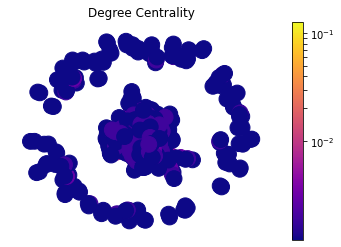

In [112]:
draw(G, pos, nx.degree_centrality(G), 'Degree Centrality')


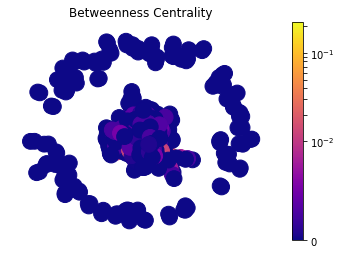

In [113]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')


NetworkXError: Node ('0xe5782724e87bcd5a1f48737ff6cfeaf875ab5873', '0x28c6c06298d514db089934071355e5743bf21d60') has no position.

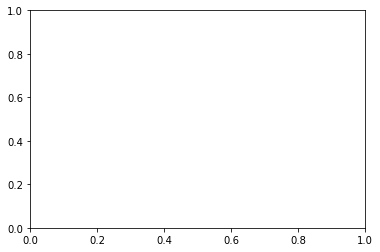

In [114]:
draw(G, pos, nx.edge_betweenness_centrality(G), 'Edge Betweenness Centrality')


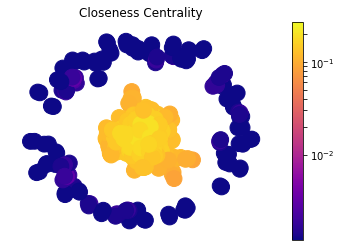

In [115]:
draw(G, pos, nx.closeness_centrality(G), 'Closeness Centrality')
